In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


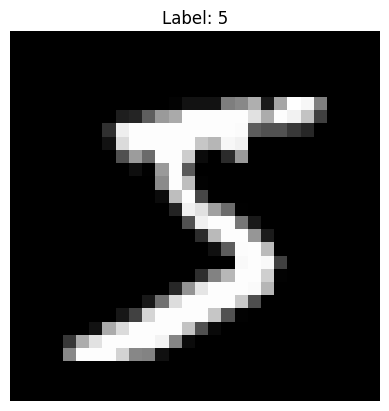

In [4]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()


In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [6]:
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)


In [7]:
print("Original label:", y_train[0])
print("One-hot encoded:", y_train_encoded[0])


Original label: 5
One-hot encoded: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)


In [10]:
history = model.fit(
    x_train,
    y_train_encoded,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7136 - loss: 1.0918 - val_accuracy: 0.9132 - val_loss: 0.3331
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8973 - loss: 0.3692 - val_accuracy: 0.9272 - val_loss: 0.2674
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9120 - loss: 0.3094 - val_accuracy: 0.9345 - val_loss: 0.2366
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9192 - loss: 0.2846 - val_accuracy: 0.9400 - val_loss: 0.2182
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9288 - loss: 0.2492 - val_accuracy: 0.9462 - val_loss: 0.1998
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9350 - loss: 0.2313 - val_accuracy: 0.9503 - val_loss: 0.1874
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9379 - loss: 0.2224 - val_accuracy: 0.9533 - val_loss: 0.1758
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9423 - loss: 0.2059 - 

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9390 - loss: 0.2044
Test Accuracy: 0.948199987411499


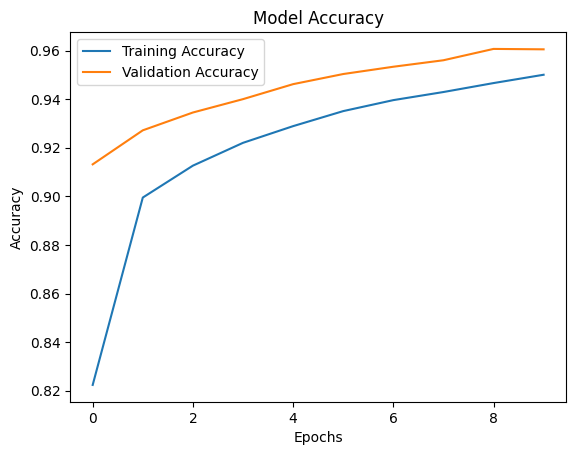

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


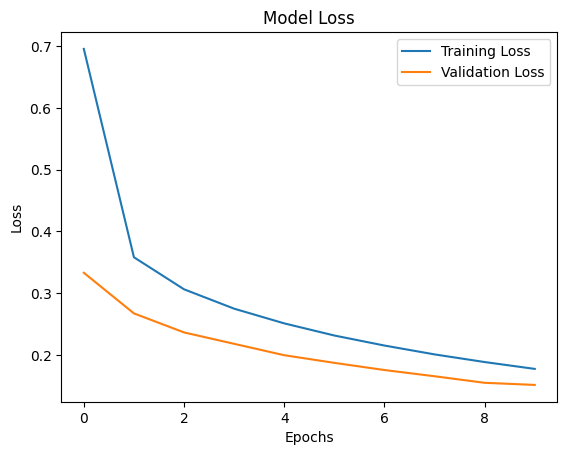

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


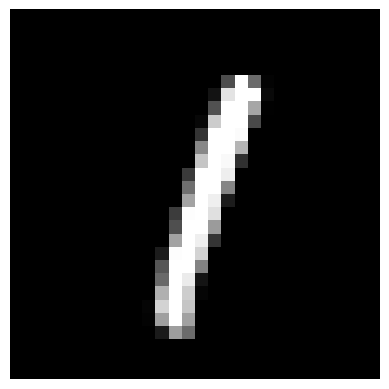

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted Digit: 1
Actual Digit: 1


In [14]:
index = 5  # choose any index
image = x_test[index]

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

prediction = model.predict(image.reshape(1, 28, 28))
predicted_digit = np.argmax(prediction)

print("Predicted Digit:", predicted_digit)
print("Actual Digit:", y_test[index])


In [15]:
predictions = model.predict(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)

print("Predicted:", predicted_classes)
print("Actual:", y_test[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted: [7 2 1 0 4 1 4 9 6 9]
Actual: [7 2 1 0 4 1 4 9 5 9]
